In [23]:
import os
import numpy as np
import cv2
import albumentations as A
from PIL import Image
from matplotlib import pyplot as plt
from albumentations import Compose, BboxParams
from imageio import imwrite

In [24]:
BOX_COLOR = (150, 0, 0)
TEXT_COLOR = (200, 200, 200)


def get_aug(aug, min_area=0., min_visibility=0.):
    return Compose(aug, bbox_params=BboxParams(format='coco', min_area=min_area, 
                                               min_visibility=min_visibility, label_fields=['category_id']))

def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=1):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    
    ## uncomment the following lines to display class label with bounding box
    #((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    #cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    #cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img


def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    
    ## uncomment the following lines to display bounding box
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
        
    plt.figure(figsize=(12, 12))
    plt.imshow(img)

def visualize_subplot(annotations, category_id_to_name):
    img = annotations['image'].copy()
    
    ## uncomment the following lines to display bounding boxes
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    
    return(img)

In [25]:
#Example files:
label_file = "/gws/nopw/j04/ai4er/users/kmgreen/data/yolo_boats/train/labels/liebre1_0.txt"
image_file = "/gws/nopw/j04/ai4er/users/kmgreen/data/yolo_boats/train/images/liebre1_0.png"

In [31]:
bboxes = []
with open(label_file, 'r') as f:
    label = f.read()
    #image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
    image = np.asarray(Image.open(image_file))
    print(image.shape)
    print(len(image.shape))
    items = label.splitlines()
    imwidth, imheight = image.shape[0], image.shape[1]
    for i in items:
        obj = i.split()
        class_id = int(obj[0])
        x_centre = float(obj[1]) * imwidth
        y_centre = float(obj[2]) * imheight
        width = float(obj[3]) * imwidth
        height = float(obj[4]) * imheight
        bb = [None] * 4
        bb[0], bb[1], bb[2], bb[3] = x_centre-width/2, y_centre-height/2, width, height
        # x1, y1, width, height
        bboxes.append(bb)
    
    annotations = {'image': image, 'bboxes': bboxes, 'category_id': [0]*len(bboxes)}
    category_id_to_name = {0: 'whale', 1: 'nonwhale'}
    
print(bboxes)

(512, 512, 3)
3
[[237.0, 235.0, 40.0, 40.0]]


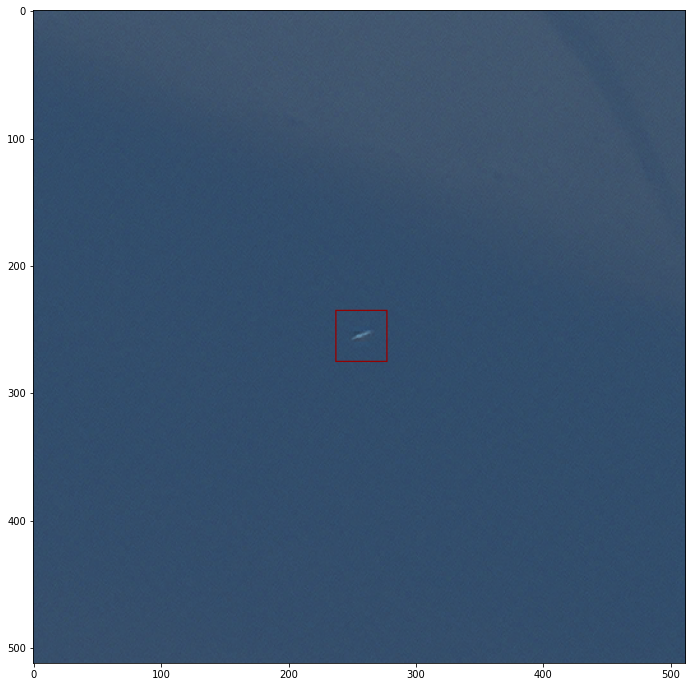

In [30]:
visualize(annotations, category_id_to_name)


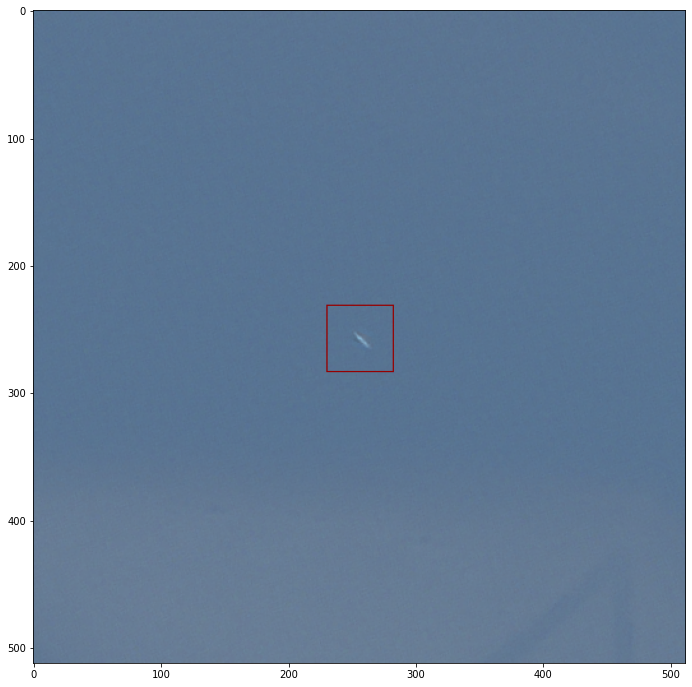

In [35]:
aug = get_aug([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.Rotate(limit=(-180,180), always_apply=True),
    A.Blur(blur_limit=3, p=0.5),
    A.RandomBrightness(limit=0.2, p=0.5),
    A.RandomContrast(limit=0.2, p=0.5),
    A.GaussianBlur(blur_limit=3, p=0.5),
    A.GaussNoise(var_limit=(10.0, 50.0), mean=0, always_apply=False, p=0.5)


])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)